In [8]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
#посмотрим среднюю выживаемость в зависимости от пола и класса пассажира
df.groupby(['Pclass', 'Sex']).mean()['Survived'].unstack()

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


можно отметить, что чаще выживали пассажиры женского пола 1 и 2 классов
если смотреть только мужчин, то чаще выживали пассажиры 1 класса, что вполне логично.

In [45]:
#Посмотрим выживаемость мужчин в зависимости от возраста и класса
df['age_range'] = pd.cut(df['Age'], 7)
df[df['Sex']=='male'].groupby(['age_range', 'Pclass']).mean()['Survived'].unstack()

Pclass,1,2,3
age_range,,,
"(0.34, 11.789]",1.000000,1.000000,0.333333
"(11.789, 23.157]",0.285714,0.052632,0.108434
"(23.157, 34.526]",0.500000,0.076923,0.193548
"(34.526, 45.894]",0.464286,0.062500,0.076923
"(45.894, 57.263]",0.360000,0.000000,0.000000
"(57.263, 68.631]",0.083333,0.250000,0.000000
"(68.631, 80.0]",0.250000,0.000000,0.000000


Видно, что выживаемость мужчин после 45 лет существенно снижается.
Мужчины, которые путешествовали 2 и 3 классом практически не выжили.

In [47]:
#Посмотрим выживаемость женщин в зависимости от возраста и класса
df['age_range'] = pd.cut(df['Age'], 7)
df[df['Sex']=='female'].groupby(['age_range', 'Pclass']).mean()['Survived'].unstack()

Pclass,1,2,3
age_range,,,
"(0.34, 11.789]",0.000000,1.000000,0.478261
"(11.789, 23.157]",1.000000,1.000000,0.527778
"(23.157, 34.526]",0.947368,0.909091,0.481481
"(34.526, 45.894]",1.000000,0.857143,0.230769
"(45.894, 57.263]",0.928571,0.857143,0.000000
"(57.263, 68.631]",1.000000,NaN,1.000000
"(68.631, 80.0]",NaN,NaN,NaN


В целом у женщин довольно высокая выживаемость. Самые низкие значения у женщин, путешествующих 3 классом, особенно в возрасте от 34 до 55-60 лет.
Что удивительно, не выжили дети женского пола (до 12 лет), которые путешествовали 1 классом. Здесь при желании можно разобраться чуть детальнее, например, а сколько вообще было девочек до 12 лет в разрезе классов. Давайте сделаем это.

In [53]:
df[(df['Sex']=='female') & (df['Age']<12)].groupby(df['Pclass'])['PassengerId'].count()

Pclass
1     1
2     8
3    23
Name: PassengerId, dtype: int64

Вот и ответ - в 1 классе была всего 1 девочка в возрасте до 12 лет, которая, к сожалению, не выжила.

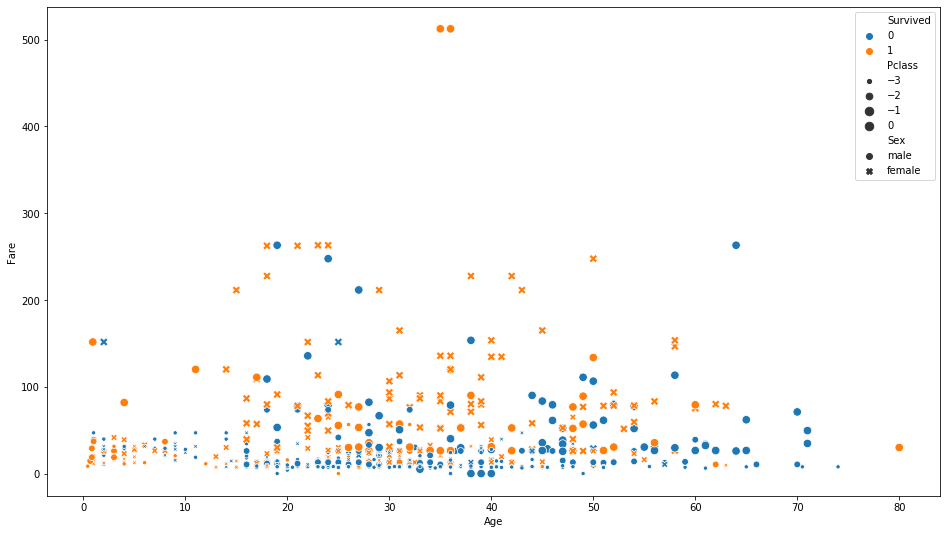

In [46]:
#посмотрим на графике зависимость выживших от стоимости билета, пола, и класса.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 9))
sns.scatterplot(x=df['Age'], y=df['Fare'], hue=df['Survived'], style=df['Sex'], size=-df['Pclass'])

Можем отметить, что выжило больше женщин.
Также больше выживших среди тех, кто заплатил больше за билет. Причем эта связь работает, начиная с возраста 15 лет. Т.е. % выживших детей не особо зависит от стоимости билета.
Очень много мужчин в возрасте от 20 лет, путешествующих более низким классом, умерло.
Спасали детей, женщин, а также мужчин, путешествующих более высоким классом, или заплатившим больше за билет.
Стоимость билета и класс имеют довольно высокую связь, что вполне логично. Однако на графике можно отметить ряд случаев, когда билет более низкого класса имел более высокую стоимость.